In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.shape

(50000, 2)

In [ ]:
data = data.sample(n=1000, random_state=42)

In [7]:
print(data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


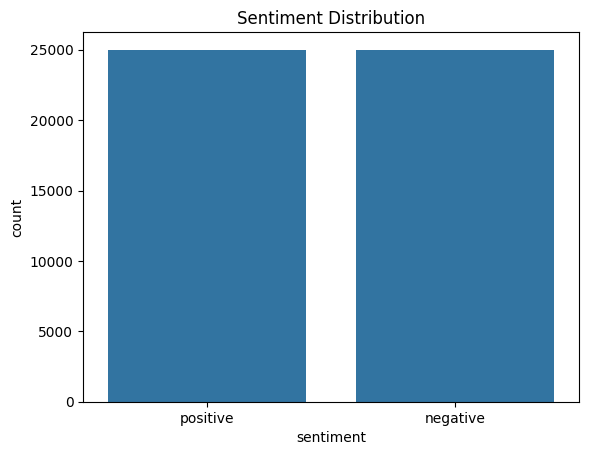

In [8]:
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [9]:
stop_words = set(stopwords.words('english'))

**Pre-Processing**

In [10]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [11]:
data['review'] = data['review'].apply(preprocess_text)

In [12]:
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])

**Splitting the data into training and testing as 70% into training and 30% into testing**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.3, random_state=42)

In [14]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [15]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [16]:
max_length = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

**Model building**

**ReLU:** ReLU is used because it introduces non-linearity and avoids the vanishing gradient problem by allowing only positive values to pass through, which helps deep networks learn efficiently.

**Sigmoid:** Sigmoid is ideal for binary classification tasks as it outputs values between 0 and 1, making it suitable for modeling probabilities and providing smooth gradient updates.

**Binary cross-entropy**

Binary cross-entropy is ideal for this sentiment analysis task as it is designed for binary classification problems like identifying positive or negative reviews. It compares the predicted probabilities from the model’s output using sigmoid activation with the actual labels and calculates the error. By penalizing large deviations, it helps the model minimize the error in predictions. This makes it well-suited for improving accuracy in sentiment classification tasks.

In [17]:
model = Sequential()
model.add(Dense(128, input_dim=max_length, activation='relu'))  # Input layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Training**

In [28]:
history = model.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.4941 - val_loss: 0.6932
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4958 - loss: 0.6932 - val_accuracy: 0.4941 - val_loss: 0.6934
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.4941 - val_loss: 0.6932
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4969 - loss: 0.6931 - val_accuracy: 0.4941 - val_loss: 0.6933
Epoch 5/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5073 - loss: 0.6938 - val_accuracy: 0.5059 - val_loss: 0.6931
Epoch 6/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5059 - val_loss: 0.6931
Epoch 7/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4941 - val_loss: 0.6933
Epoch 8/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5044 - loss: 0.6931 - 

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4967 - loss: 0.6932
Loss: 0.6931691765785217, Accuracy: 0.49406665563583374


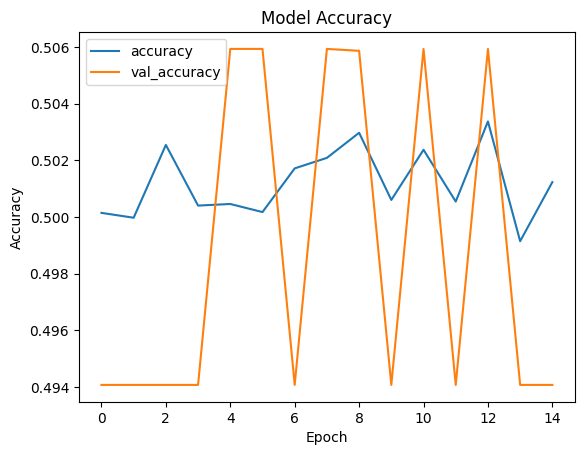

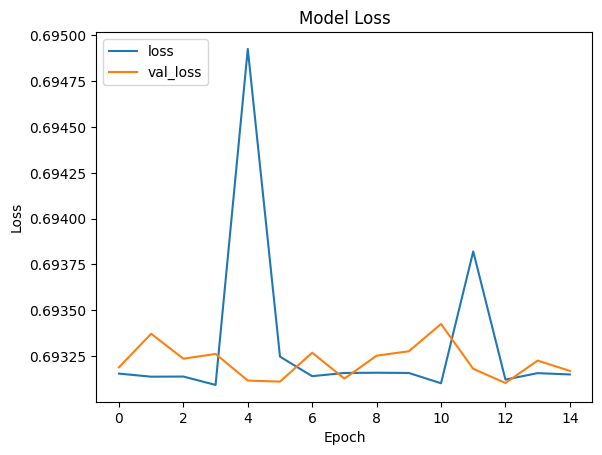

In [29]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Model Loss')
plt.show()


**Model Performance**

**Model Accuracy:**

The training accuracy  shows a generally increasing trend, indicating some learning over time. However, the validation accuracy fluctuates significantly, indicating overfitting or instability, where the model does not generalize well on unseen data.

**Model Loss:**

The training loss starts decreasing with some fluctuations, suggesting the model is trying to minimize errors. However, the validation loss shows unstable behavior, spiking at certain epochs, indicating that the model may be struggling with overfitting or has difficulty generalizing across epochs.


**Pre-Processing:**

**Preprocessing:** The text data was first converted to lowercase for consistency, and common stopwords were removed to reduce noise and focus on meaningful words.

**Label Encoding:** Sentiment labels were encoded into numerical values using a LabelEncoder to allow machine learning algorithms to process the categorical data.


**Model Architecture:**

**Sequential Model:** The model is built using a Sequential architecture, which stacks layers in a linear manner. This structure is ideal for tasks where data flows from one layer to the next in a straightforward sequence.

**Input Layer:** The input layer is a Dense layer with 128 neurons, using ReLU activation to introduce non-linearity. It processes the input data of length max_length, transforming it into a form usable by the network.

**Hidden Layer:** Another Dense layer with 64 neurons follows, also using ReLU activation. It further refines the data, allowing the model to learn more complex relationships.

**Output Layer:** The final layer is a single-neuron Dense layer using the sigmoid activation function, designed for binary classification by outputting a probability between 0 and 1.

**Compiling the Model:** The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric, which together ensure efficient training and accurate performance tracking.

**XOR GATE**

Predictions: [0 0 0 0]
True Outputs: [0 1 1 0]
Accuracy: 0.5


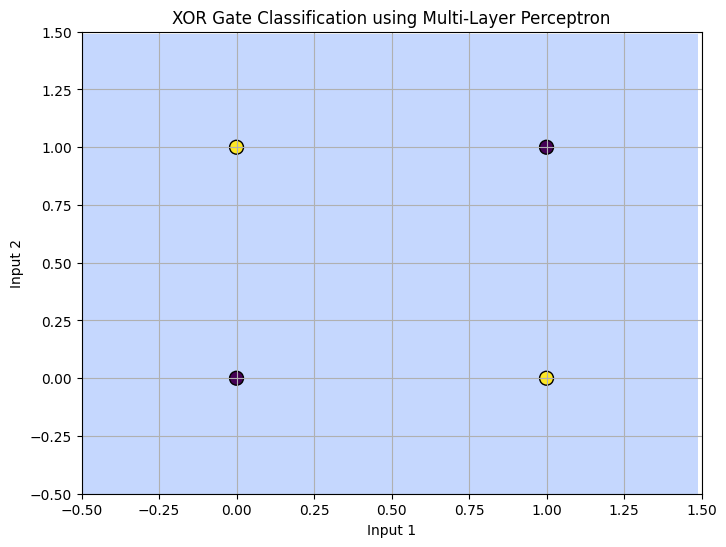

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=10000, random_state=1)

mlp.fit(X, y)

predictions = mlp.predict(X)

accuracy = accuracy_score(y, predictions)

print("Predictions:", predictions)
print("True Outputs:", y)
print("Accuracy:", accuracy)

xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title('XOR Gate Classification using Multi-Layer Perceptron')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()


Predictions: [0 1 1 0]
True Outputs: [0 1 1 0]
Accuracy: 1.0


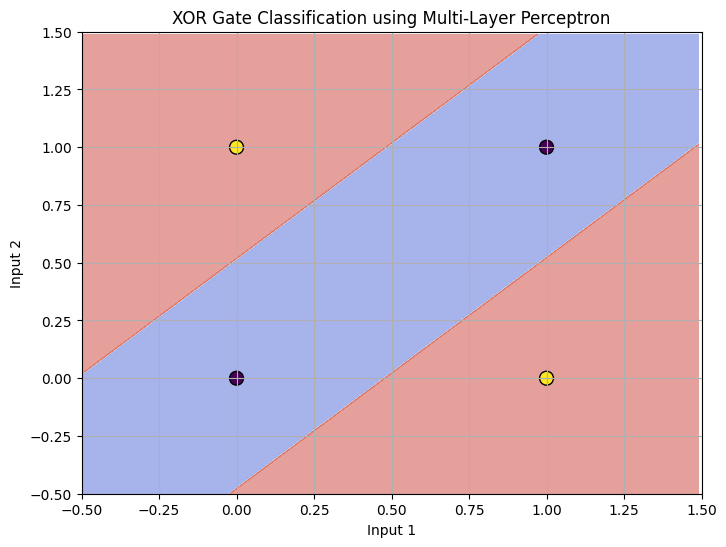

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=10000, random_state=1)

mlp.fit(X, y)

predictions = mlp.predict(X)

accuracy = accuracy_score(y, predictions)

print("Predictions:", predictions)
print("True Outputs:", y)
print("Accuracy:", accuracy)

xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title('XOR Gate Classification using Multi-Layer Perceptron')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()


**Observation**

The perceptron cannot solve the XOR problem with a single layer due to its non-linear separability. However, the MLP with one hidden layer successfully captures this complexity, resulting in accurate predictions.

As we can see in the above when the hidden layer is 2 predicted output are zero and when we increased the hidden layer to 4 can we see that the model is tranined well and it predicted the correct output to the actual putput